# Prepare dataset

In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [56]:
#import data 
df = pd.read_csv('https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv')

In [57]:
#This data frame is from GitHub, for this project it is an ideal dataset since it has labeled row for sentiments,
#and the tweets are about tech Companies
df

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...
...,...,...,...,...,...
5108,twitter,irrelevant,126855687060987904,Thu Oct 20 03:02:07 +0000 2011,me re copè con #twitter
5109,twitter,irrelevant,126855171702661120,Thu Oct 20 03:00:04 +0000 2011,Buenas noches genteeee :) #twitter los quieroo...
5110,twitter,irrelevant,126854999442587648,Thu Oct 20 02:59:23 +0000 2011,#twitter tiene la mala costumbre de ponerce bn...
5111,twitter,irrelevant,126854818101858304,Thu Oct 20 02:58:40 +0000 2011,Oi @flaviasansi. Muito bem vinda ao meu #Twitt...


In [58]:
#Check how many companies are represented in the dataset
df['Topic'].value_counts()

microsoft    1364
google       1317
twitter      1290
apple        1142
Name: Topic, dtype: int64

In [59]:
#Check how many categories have for sentiments
df['Sentiment'].value_counts()

neutral       2333
irrelevant    1689
negative       572
positive       519
Name: Sentiment, dtype: int64

In [60]:
#For this project I will not need "irrelevant" tweets, so I filter it out
df_filtered = df[df['Sentiment'] != 'irrelevant'] 

In [61]:
# I have class imbalance, I will deal with that after data cleaning
df_filtered['Sentiment'].value_counts()

neutral     2333
negative     572
positive     519
Name: Sentiment, dtype: int64

# Data cleaning

In [62]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristofcsaba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
stemmer = PorterStemmer()
#create functions to remove stopwords, remove mentions
def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
    return re.sub(r'@\w+', '', input_text)

In [64]:
df_filtered['TweetText'] = df_filtered['TweetText'].apply(remove_stopwords).apply(remove_mentions)

In [65]:
df_filtered.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now get swype iphone crack. Iphone
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,adding carrier support iPhone 4S (just announ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious video guy duet 's Siri. Pretty muc...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,made easy switch iPhone. See ya!
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,realized reason got twitter ios5 thanks


In [66]:
#create functions to stem the words and normalize text
def stemList(wordList):
    stemmed = []
    for word in wordList:
        stemmedword = stemmer.stem(word)
        stemmed.append(stemmedword)
    return stemmed

def normalize(pref):
    pref = pref.lower()
    word_delimiters = u'[\\[\\]\n.!?,;:\t\\-\\"\\(\\)\\\'\u2019\u2013 ]'
    prefList = re.split(word_delimiters, pref)
    trimmed = [x.rstrip() for x in prefList]
    stemmed = stemList(trimmed)
    space = ' '
    normed = space.join(stemmed)
    normed = normed.replace('  ', ' ')
    return normed

In [67]:
df_filtered['normalized'] = df_filtered['TweetText'].apply(normalize)

In [68]:
df_filtered['normalized']

0                         now get swype iphon crack iphon
1               ad carrier support iphon 4s just announc 
2       hilari video guy duet  s siri pretti much sum ...
3                          made easi switch iphon see ya 
4                   realiz reason got twitter ios5 thank 
                              ...                        
4537     modern day autograph  like way put that #twitter
4538    62 way use #twitter busi http //t co/jyxk7okc ...
4539    log #facebook on #twitter but think i m bout g...
4540             #twitter s dumb like it  hush up justin 
4541    it s almost 4 20 where bong is pack let s rip ...
Name: normalized, Length: 3424, dtype: object

In [69]:
df_filtered

,Topic,Sentiment,TweetId,TweetDate,TweetText,normalized
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now get swype iphone crack. Iphone,now get swype iphon crack iphon
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,adding carrier support iPhone 4S (just announ...,ad carrier support iphon 4s just announc
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious video guy duet 's Siri. Pretty muc...,hilari video guy duet s siri pretti much sum ...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,made easy switch iPhone. See ya!,made easi switch iphon see ya
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,realized reason got twitter ios5 thanks,realiz reason got twitter ios5 thank
...,...,...,...,...,...,...
4537,twitter,neutral,126855838047547392,Thu Oct 20 03:02:43 +0000 2011,"'Modern Day Autograph"", like way put that. #t...",modern day autograph like way put that #twitter
4538,twitter,neutral,126855191571070976,Thu Oct 20 03:00:09 +0000 2011,62 Ways Use #Twitter Business: http://t.co/jYX...,62 way use #twitter busi http //t co/jyxk7okc ...
4539,twitter,neutral,126854358817181696,Thu Oct 20 02:56:50 +0000 2011,Log #Facebook On #Twitter But Think i'm bout g...,log #facebook on #twitter but think i m bout g...
4540,twitter,neutral,126853667738497025,Thu Oct 20 02:54:05 +0000 2011,"""#twitter's dumb, like it."" Hush up, Justin.",#twitter s dumb like it hush up justin


# Data exploration

In [106]:
# I will create 2 wordclouds to see what are the most frequently used words for postive and negative feedbacks 
#at Google

In [97]:
google_positive_filtered = df_filtered[(df_filtered['Sentiment'] == 'positive') & (df_filtered['Topic'] == 'google')]

In [102]:
text_google_positive = google_positive_filtered['normalized'].tolist()

In [103]:
doc_google_positive = ' '.join(text_google_positive)

In [104]:
from wordcloud import WordCloud

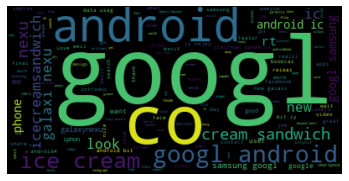

In [105]:
wordcloud_google_positive = WordCloud().generate(str(doc_google_positive))
plt.imshow(wordcloud_google_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

As for positive feedbacks the most commonly used word was google, however ice cream, galaxy, and nexus are also frequently used words in postive feedback for google

In [96]:
google_negative_filtered = df_filtered[(df_filtered['Sentiment'] == 'negative') & (df_filtered['Topic'] == 'google')]


In [87]:
text_google_negative = google_negative_filtered['normalized'].tolist()

In [91]:
doc_google_negative = ' '.join(text_google_negative)

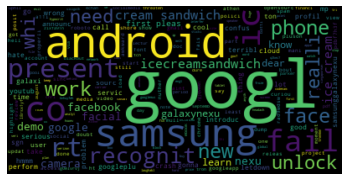

In [93]:
wordcloud_google_negative = WordCloud().generate(str(doc_google_negative))
plt.imshow(wordcloud_google_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

As for negative feedback, the most commonly used word is google, but samsung, present, unlock, and phone are also frequently used words in negative google feedbacks

# Data engineering

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.model_selection import train_test_split
#Predictor variable is the already normalized tweets
X = df_filtered['normalized']
#Target variable is the three sentiments: positive, negative, and neutral
Y = df_filtered['Sentiment']

#Since I have unbalanced target (much more neutral than postive or negative), I will use stratify
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y) 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5, min_df=2, use_idf=True, norm=u'l2', smooth_idf=True)


# Applying the vectorizer on my training data
X = vectorizer.fit_transform(X_train)

X_train_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

X_train_tfidf.head()

,000,00pm,0kcgbmwf,10,100,1000,1000aday,101,1080p,11,...,your,yourself,yousendit,youtub,yr,ytn5ohym,zero,zryndhdi,zuckerberg,zune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Applying the vectorizer on test data, only use transform
X = vectorizer.transform(X_test)

X_test_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

X_test_tfidf.head()

,000,00pm,0kcgbmwf,10,100,1000,1000aday,101,1080p,11,...,your,yourself,yousendit,youtub,yr,ytn5ohym,zero,zryndhdi,zuckerberg,zune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Apply machine learning models

In [107]:
# I will use 4 classifier algorithms to predict the sentiment of the text

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
nb = MultinomialNB()

#Fitting the model on training data
lr.fit(X_train_tfidf, y_train)
rfc.fit(X_train_tfidf, y_train)
gbc.fit(X_train_tfidf, y_train)
nb.fit(X_train_tfidf, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train_tfidf, y_train))
print('\nTest set score:', lr.score(X_test_tfidf, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train_tfidf, y_train))
print('\nTest set score:', gbc.score(X_test_tfidf, y_test))

print("----------------------Multinomial Naive Bayes----------------------")
print('Training set score:', nb.score(X_train_tfidf, y_train))
print('\nTest set score:', nb.score(X_test_tfidf, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.8433734939759037

Test set score: 0.762043795620438
----------------------Random Forest Scores----------------------
Training set score: 0.9956188389923329

Test set score: 0.7751824817518248
----------------------Gradient Boosting Scores----------------------
Training set score: 0.8152610441767069

Test set score: 0.7401459854014598
----------------------Multinomial Naive Bayes----------------------
Training set score: 0.7513691128148959

Test set score: 0.7226277372262774


The highest test scores are from Random Forest Classifier and Logistic Regression. Logistic Regressrion has less over fitting than Random Forest, but more than Gradient Boosting and Navie Bayes. Further evalutaion needed to determine the best model. 

# Evaluating Models

In [108]:
# The goal is to find the model which produces the highest precision at postive and negative feedback,
# beacuse we want to identify as much potiive and negative feedbacks as possible. The reason for that 
# we want to identify positive and negative beacause they can help organizations to understand what their customer
# want and need. 

In [20]:
#import libaries for metrics and for visuals
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

## Logistic Regression

In [21]:
#create a variable to safe a confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr.predict(X_test_tfidf))

cm_lr

array([[ 53,  61,   0],
       [ 11, 440,  16],
       [  1,  74,  29]])

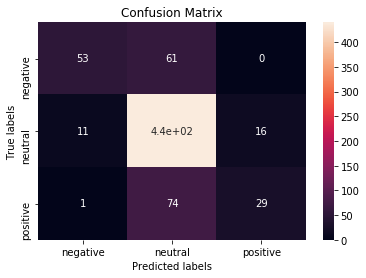

<Figure size 3600x3600 with 0 Axes>

In [22]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax); #annot=True to annotate cells

plt.figure(figsize=(50, 50))

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);
plt.show()

In [23]:
#create a classification report for Logistic Regression
print(classification_report(y_test, lr.predict(X_test_tfidf)))

              precision    recall  f1-score   support

    negative       0.82      0.46      0.59       114
     neutral       0.77      0.94      0.84       467
    positive       0.64      0.28      0.39       104

    accuracy                           0.76       685
   macro avg       0.74      0.56      0.61       685
weighted avg       0.76      0.76      0.73       685



Logistic Regression does well overall, however, the precision could be higher

## Random Forest Classifier

In [33]:
#create a variable to safe a confusion matrix for Random Forest Classifier
cm_rfc = confusion_matrix(y_test, rfc.predict(X_test_tfidf))

cm_rfc

array([[ 59,  55,   0],
       [ 12, 436,  19],
       [  3,  65,  36]])

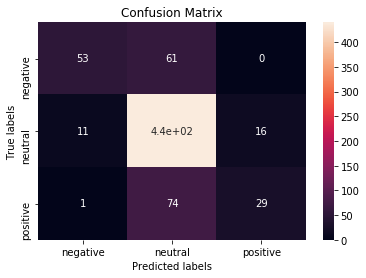

<Figure size 3600x3600 with 0 Axes>

In [34]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax); #annot=True to annotate cells

plt.figure(figsize=(50, 50))

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);
plt.show()

In [35]:
#create a classification report for Random Forest Classifier
print(classification_report(y_test, rfc.predict(X_test_tfidf)))

              precision    recall  f1-score   support

    negative       0.80      0.52      0.63       114
     neutral       0.78      0.93      0.85       467
    positive       0.65      0.35      0.45       104

    accuracy                           0.78       685
   macro avg       0.75      0.60      0.64       685
weighted avg       0.77      0.78      0.75       685



Random Forest Classifier has high f1-scores, but the precision still not as high as I wnated to be

## Gradient Boosting

In [27]:
#create a variable to safe a confusion matrix for Gradient Boosting
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test_tfidf))

cm_gbc

array([[ 43,  68,   3],
       [  6, 442,  19],
       [  2,  80,  22]])

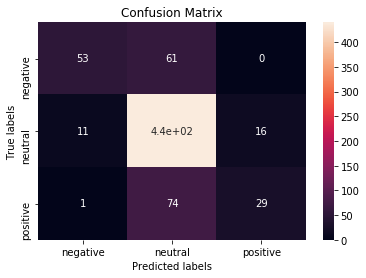

<Figure size 3600x3600 with 0 Axes>

In [28]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax); #annot=True to annotate cells

plt.figure(figsize=(50, 50))

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);
plt.show()

In [29]:
#create a classification report for Gradient Boosting
print(classification_report(y_test, gbc.predict(X_test_tfidf)))

              precision    recall  f1-score   support

    negative       0.84      0.38      0.52       114
     neutral       0.75      0.95      0.84       467
    positive       0.50      0.21      0.30       104

    accuracy                           0.74       685
   macro avg       0.70      0.51      0.55       685
weighted avg       0.73      0.74      0.70       685



Gradient Boosting does not do a very good job for this use case

## Multinomial Naive Bayes

In [30]:
#create a variable to safe a confusion matrix for Multinomial Naive Bayes
cm_nb = confusion_matrix(y_test, nb.predict(X_test_tfidf))

cm_nb

array([[ 23,  91,   0],
       [  2, 465,   0],
       [  0,  97,   7]])

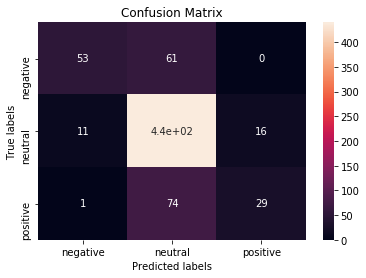

<Figure size 3600x3600 with 0 Axes>

In [31]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_nb, annot=True, ax = ax); #annot=True to annotate cells

plt.figure(figsize=(50, 50))

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);
plt.show()

In [32]:
#create a classification report for Multinomial Naive Bayes
print(classification_report(y_test, nb.predict(X_test_tfidf)))

              precision    recall  f1-score   support

    negative       0.92      0.20      0.33       114
     neutral       0.71      1.00      0.83       467
    positive       1.00      0.07      0.13       104

    accuracy                           0.72       685
   macro avg       0.88      0.42      0.43       685
weighted avg       0.79      0.72      0.64       685



Multinomial Naive Bayes has the highest precision for Negative and Positive sentiments. Additonally, in terms of precision Multinomial Naive Bayes perform slightly better for all three classes than any of the other models. For this business case I choose Multinomial Naive Bayes for predicting sentiments from tweet texts.